In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_l', root='insightface_model', providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Extract facial features and labels

In [3]:
# regular expression
import re

In [4]:
# fn to remove any hypen or special char between the first & last name
def clean_name(string):
    string = re.sub(r'[^A-Za-z]',' ', string)
    string = string.title()
    return string

# clean_name('chris_evans')

In [5]:
# Return a list containing the names of the files in the directory.
# os.listdir()

# Return a list inside images folder containing the names of the files in the directory.
# os.listdir(path='images')
# os.listdir(path='images/student-Angelina Jolie')
person_info = []
listdir = os.listdir(path='images')


# 0 - role, 1 - name
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name);
    role = clean_name(role)
    # print('role :', role, end='\t')
    # print('name :', name)

    # path of each folder in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    # print(img_files)
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # print(path)

        # step-1 : read the image
        img_arr = cv2.imread(path)

        # step-2 : get the info
        result = faceapp.get(img_arr, max_num=1); # return lists
        # print(result[0].keys())
        # print(result)
        
        if len(result) > 0:
            # step-3 : extract facial embedding
            res = result[0]
            # print(res.keys())
            embedding = res['embedding']
            # step-4 : save all info, name, role, embedding in a list
            person_info.append([name, role, embedding])


In [6]:
# The name, role, embedding is inside the person_info array
# print(person_info)

# table to see data easily
dataframe = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])

# store in redis
dataframe

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.07831791, 1.9013718, -0.02304697, -0.933570..."
1,Angelina Jolie,Student,"[0.23100808, 0.97979856, -0.7245434, -0.320748..."
2,Angelina Jolie,Student,"[0.071140125, 2.1640797, -0.3409788, -0.747431..."
3,Angelina Jolie,Student,"[0.48568797, 2.1133444, 0.44487166, -0.6644553..."
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346..."
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377..."
6,Angelina Jolie,Student,"[0.944736, 1.6260443, -0.2522791, -1.4114289, ..."
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088..."
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406..."
9,Angelina Jolie,Student,"[0.75210977, 1.209834, 0.04368511, -1.4505601,..."


### INFERENCE STAGE

NEW PERSON IMAGE  -> FEATURE EXTRACTION -> MACHINE LEARNING SEARCH ALGO -> PERSON NAME

1. Take new person image
2. Extract feature from the image
3. apply ml search algo in db & extract person name 

#### Step-1 : Read test image

In [7]:
# img_test = cv2.imread('test_images/test_2.jpeg')
img_test = cv2.imread('test_images/sameer_test.PNG')

cv2.imshow('chris evans', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Step-2 : Extract the features 

In [8]:
res_test = faceapp.get(img_test, max_num=0)
# print(result_test)

for i,rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

current loop = 0


In [9]:
# ONLY 1 SAMPLE IMAGE (no of dimensions in 1 image)
len(embed_test)

512

### Compare the test image facial embedding with all facial embedding avl inside the dataframe

In [10]:
dataframe.head()

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.07831791, 1.9013718, -0.02304697, -0.933570..."
1,Angelina Jolie,Student,"[0.23100808, 0.97979856, -0.7245434, -0.320748..."
2,Angelina Jolie,Student,"[0.071140125, 2.1640797, -0.3409788, -0.747431..."
3,Angelina Jolie,Student,"[0.48568797, 2.1133444, 0.44487166, -0.6644553..."
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346..."


In [11]:
# convert list to array
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [12]:
# each 50 samples has 512 dimensions
X.shape

(60, 512)

In [13]:
from sklearn.metrics import pairwise

In [14]:
# euclidean , manhattan distance, cosine similarity

y = embed_test.reshape(1, 512) # reshape to row vector, 1 * 512

equlidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distance = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [15]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [16]:
data_search

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[0.07831791, 1.9013718, -0.02304697, -0.933570...",33.416874,597.532289,-0.018121
1,Angelina Jolie,Student,"[0.23100808, 0.97979856, -0.7245434, -0.320748...",33.525253,595.356773,-0.018656
2,Angelina Jolie,Student,"[0.071140125, 2.1640797, -0.3409788, -0.747431...",31.856236,573.492044,0.039450
3,Angelina Jolie,Student,"[0.48568797, 2.1133444, 0.44487166, -0.6644553...",32.424522,579.823606,0.035129
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346...",32.659824,593.137858,-0.012038
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377...",31.747797,576.336793,0.060182
6,Angelina Jolie,Student,"[0.944736, 1.6260443, -0.2522791, -1.4114289, ...",33.716534,609.200351,0.014713
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088...",32.360882,585.014719,0.038224
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406...",32.730778,589.310929,0.020627
9,Angelina Jolie,Student,"[0.75210977, 1.209834, 0.04368511, -1.4505601,...",33.500099,596.329639,0.033485


In [17]:
import matplotlib.pyplot as plt

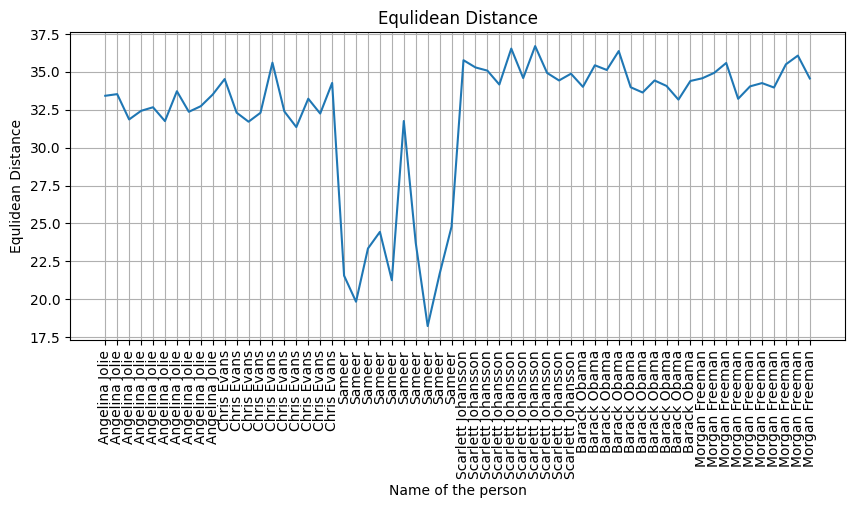

In [18]:
# Equlidean
# X axis : row no / record no
# Y axis : distance

plt.figure(figsize=(10,4))
plt.plot(data_search['equlidean'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))), labels=data_search['Name'], rotation=90)
plt.title("Equlidean Distance")
plt.xlabel('Name of the person')
plt.ylabel('Equlidean Distance')

plt.grid()
plt.show()

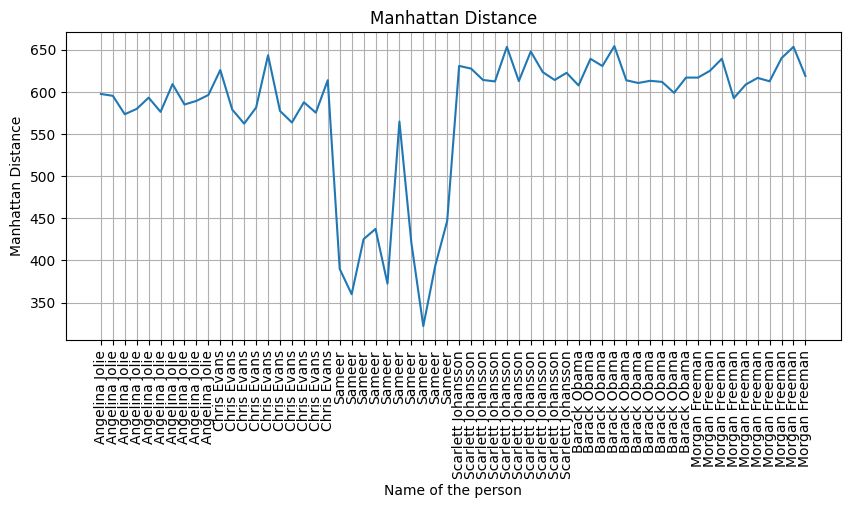

In [19]:
# Manhattan distance
# X axis : row no / record no
# Y axis : distance

plt.figure(figsize=(10,4))
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))), labels=data_search['Name'], rotation=90)
plt.title("Manhattan Distance")
plt.xlabel('Name of the person')
plt.ylabel('Manhattan Distance')

plt.grid()
plt.show()

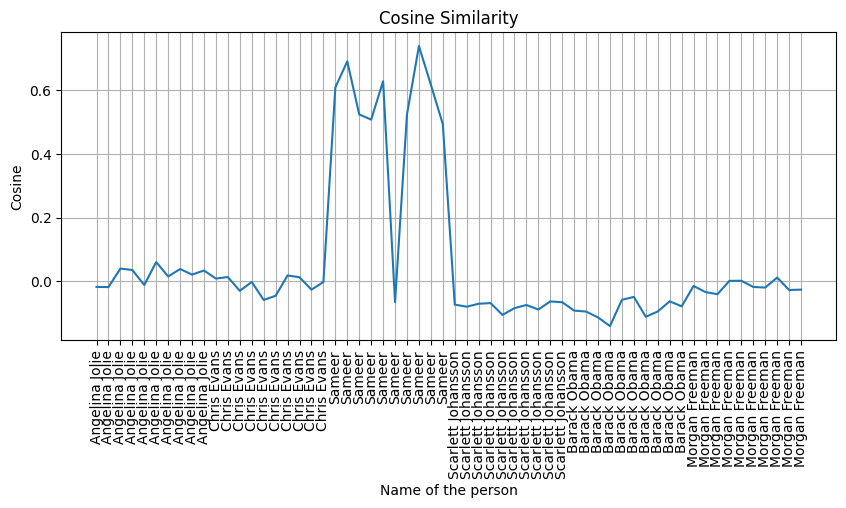

In [20]:
# Cosine Similarity
# X axis : row no / record no
# Y axis : distance

plt.figure(figsize=(10,4))
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))), labels=data_search['Name'], rotation=90)
plt.title("Cosine Similarity")
plt.xlabel('Name of the person')
plt.ylabel('Cosine')

plt.grid()
plt.show()

## Finding person name using Equilidean distance
- Threshold point afer analysing the graph : **24**
- The data points having distance < 24 will be considered similar

In [21]:
# optimal distance
d_eq_optimal = 24

In [22]:
# filtering data which have distance < 24
datafilter = data_search.query(f'equlidean < {d_eq_optimal} ')
datafilter.reset_index(drop=True, inplace=True)
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Sameer,Student,"[1.088434, 0.71730036, 1.3399961, -1.0168153, ...",21.558908,389.948457,0.608441
1,Sameer,Student,"[1.5009618, 0.38175106, 1.7126327, -0.4877761,...",19.840672,359.983951,0.690704
2,Sameer,Student,"[0.35216883, 1.8425645, 0.29331827, -1.8696843...",23.350813,425.274253,0.523893
3,Sameer,Student,"[0.65049696, 0.7089228, 1.2564955, -2.6880531,...",21.257864,372.539870,0.628192
4,Sameer,Student,"[-0.19394396, 1.8680943, 0.70004857, -1.287409...",23.720444,421.031946,0.523923
5,Sameer,Student,"[0.9016882, 0.26749068, 1.7389045, -2.2938008,...",18.233397,322.126299,0.738598
6,Sameer,Student,"[0.8820233, -0.2658397, 1.9172091, -2.1781237,...",21.672981,393.699950,0.617256


In [23]:
# find minimum distance among all the data for name extraction & its complete info

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    # print("Index with minimum distance among all the similar data found : ", argmin)
    # print("\n")
    # print(datafilter.loc[argmin])
    eq_name, eq_role = datafilter.loc[argmin][['Name', 'Role']]
else : 
    name = "Unknown"
    role = 'Unknown'

In [24]:
print(eq_role, eq_name)

Student Sameer


## Finding person name using Manhattan distance
- Threshold point afer analysing the graph : **450**
- The data points having distance < 450 will be considered similar

In [25]:
d_mn_optimal = 450

In [26]:
# filtering data which have manhattan distance < 350
datafilter = data_search.query(f'manhattan < {d_mn_optimal} ')
datafilter.reset_index(drop=True, inplace=True)
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Sameer,Student,"[1.088434, 0.71730036, 1.3399961, -1.0168153, ...",21.558908,389.948457,0.608441
1,Sameer,Student,"[1.5009618, 0.38175106, 1.7126327, -0.4877761,...",19.840672,359.983951,0.690704
2,Sameer,Student,"[0.35216883, 1.8425645, 0.29331827, -1.8696843...",23.350813,425.274253,0.523893
3,Sameer,Student,"[1.1231265, 0.4159097, 2.0186617, -0.545614, 0...",24.444756,437.444771,0.507617
4,Sameer,Student,"[0.65049696, 0.7089228, 1.2564955, -2.6880531,...",21.257864,372.539870,0.628192
5,Sameer,Student,"[-0.19394396, 1.8680943, 0.70004857, -1.287409...",23.720444,421.031946,0.523923
6,Sameer,Student,"[0.9016882, 0.26749068, 1.7389045, -2.2938008,...",18.233397,322.126299,0.738598
7,Sameer,Student,"[0.8820233, -0.2658397, 1.9172091, -2.1781237,...",21.672981,393.699950,0.617256
8,Sameer,Student,"[0.569662, 1.2875302, 1.2316017, -1.5708574, 0...",24.790094,446.818984,0.493483


In [27]:
# find minimum distance among all the data for name extraction & its complete info

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    # print("Index with minimum distance among all the similar data found : ", argmin)
    # print("\n")
    # print(datafilter.loc[argmin])
    mn_name, mn_role = datafilter.loc[argmin][['Name', 'Role']]
else : 
    mn_name = "Unknown"
    mn_role = 'Unknown'

In [28]:
print(mn_name, mn_role)

Sameer Student


## Identify person name using Cosime Similarity
- Threshold point afer analysing the graph : **0.5**
- The data points having cosine value > 0.5 will be considered similar

In [29]:
S_optimal = 0.5

In [30]:
# filtering data which have cosine value > 0.5
datafilter = data_search.query(f'cosine > {S_optimal} ')
datafilter.reset_index(drop=True, inplace=True)
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Sameer,Student,"[1.088434, 0.71730036, 1.3399961, -1.0168153, ...",21.558908,389.948457,0.608441
1,Sameer,Student,"[1.5009618, 0.38175106, 1.7126327, -0.4877761,...",19.840672,359.983951,0.690704
2,Sameer,Student,"[0.35216883, 1.8425645, 0.29331827, -1.8696843...",23.350813,425.274253,0.523893
3,Sameer,Student,"[1.1231265, 0.4159097, 2.0186617, -0.545614, 0...",24.444756,437.444771,0.507617
4,Sameer,Student,"[0.65049696, 0.7089228, 1.2564955, -2.6880531,...",21.257864,372.539870,0.628192
5,Sameer,Student,"[-0.19394396, 1.8680943, 0.70004857, -1.287409...",23.720444,421.031946,0.523923
6,Sameer,Student,"[0.9016882, 0.26749068, 1.7389045, -2.2938008,...",18.233397,322.126299,0.738598
7,Sameer,Student,"[0.8820233, -0.2658397, 1.9172091, -2.1781237,...",21.672981,393.699950,0.617256


In [31]:
# find cosine value among all the data for name extraction & its complete info

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    # print("Index with minimum distance among all the similar data found : ", argmax)
    # print("\n")
    print(datafilter.loc[argmax])
    name_cos, role_cos = datafilter.loc[argmax][['Name', 'Role']]
else : 
    name_cos = "Unknown"
    role_cos = 'Unknown'

Name                                                          Sameer
Role                                                         Student
Facial_Features    [0.9016882, 0.26749068, 1.7389045, -2.2938008,...
equlidean                                                  18.233397
manhattan                                                 322.126299
cosine                                                      0.738598
Name: 6, dtype: object


In [32]:
print(name_cos, role_cos)

Sameer Student


### IDENTIFY MULTIPLE PERSONS IN AN IMAGE

In [33]:
def ml_search_algorithm(dataframe, feature_column, test_vector, name_role = ['Name', 'Role'], thresh=0.5) :
    # STEP 1 : Take the dataframe (collection of data)
    dataframe = dataframe.copy();
    
    # STEP 2 : Index face embedding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist();
    x = np.asarray(X_list);
    
    # STEP 3 : Calculate the COSINE similarity matrix 
    similar = pairwise.cosine_similarity(x, test_vector.reshape(1, -1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # STEP 4 : Filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0 :
        # STEP 5 : Get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role] 
    else :
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role
        

In [34]:
# Image where the multiple detection will take place

test_image = cv2.imread('test_images/test_10.jpg')

# Resize image to fit the screen
screen_res = 1500,1050  # Adjust this based on your screen resolution
scale_width = screen_res[0] / test_image.shape[1]
scale_height = screen_res[1] / test_image.shape[0]
scale = min(scale_width, scale_height)
window_width = int(test_image.shape[1] * scale)
window_height = int(test_image.shape[0] * scale)

# Resize the image
resized_test_image = cv2.resize(test_image, (window_width, window_height))

cv2.imshow("test Image" ,resized_test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
# apply test image to model

results = faceapp.get(resized_test_image)
resized_test_copy = resized_test_image.copy()

# loop and extract each face embedding using ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compressed, "Facial_Features", test_vector=embeddings, name_role=['Name', 'Role'], thresh=0.5)

    if(person_name == 'Unknown') :
        color = (0,0,255)
    else : 
        color = (0,255,0)
        
    # print(person_name, person_role)
    cv2.rectangle(resized_test_copy, (x1, y1), (x2, y2), color)

    text_gen = person_name
    cv2.putText(resized_test_copy, text_gen, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.7, color, 2)

cv2.imshow("test Image", resized_test_copy);
cv2.waitKey()
cv2.destroyAllWindows()

### Compress collected data 

- store mean of facial embedding of all the data of single person
- independence execution context
- code is working fine with compressed dataframe
- store it in file csv, pickle etc

In [38]:
dataframe_compressed = dataframe.groupby(by=['Name', 'Role']).mean()
dataframe_compressed.reset_index(inplace=True)
dataframe_compressed

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.1988239049911499, 1.4747136116027832, -0.09..."
1,Barack Obama,Teacher,"[-0.2219238758087158, 1.5761836051940918, -0.5..."
2,Chris Evans,Student,"[0.3567979335784912, -0.4150068283081055, 0.03..."
3,Morgan Freeman,Teacher,"[0.7627915382385254, 0.8906878471374512, 0.468..."
4,Sameer,Student,"[0.575063943862915, 0.6750716209411621, 1.2931..."
5,Scarlett Johansson,Student,"[-0.1352797269821167, -0.2821342945098877, -0...."


### Converting dataframe into array and saving it in numpy zip format

In [39]:
xvalues = dataframe_compressed.values
# xvalues

In [40]:
col_name = np.array(dataframe_compressed.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [41]:
np.savez("stud_teacher_dataframe.npz", xvalues, col_name)

In [42]:
# Load numpy zip

file_np = np.load("stud_teacher_dataframe.npz", allow_pickle=True)
file_np.files       # xvalues, col_name

['arr_0', 'arr_1']

In [43]:
# Rough : trying to restore everything from numpy array

pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.1988239049911499, 1.4747136116027832, -0.09..."
1,Barack Obama,Teacher,"[-0.2219238758087158, 1.5761836051940918, -0.5..."
2,Chris Evans,Student,"[0.3567979335784912, -0.4150068283081055, 0.03..."
3,Morgan Freeman,Teacher,"[0.7627915382385254, 0.8906878471374512, 0.468..."
4,Sameer,Student,"[0.575063943862915, 0.6750716209411621, 1.2931..."
5,Scarlett Johansson,Student,"[-0.1352797269821167, -0.2821342945098877, -0...."


### Calculating accuracy

Accuracy: 16.67%
['Scarlett Johansson', 'Unknown', 'Chris Evans', 'Unknown', 'Unknown', 'Unknown']


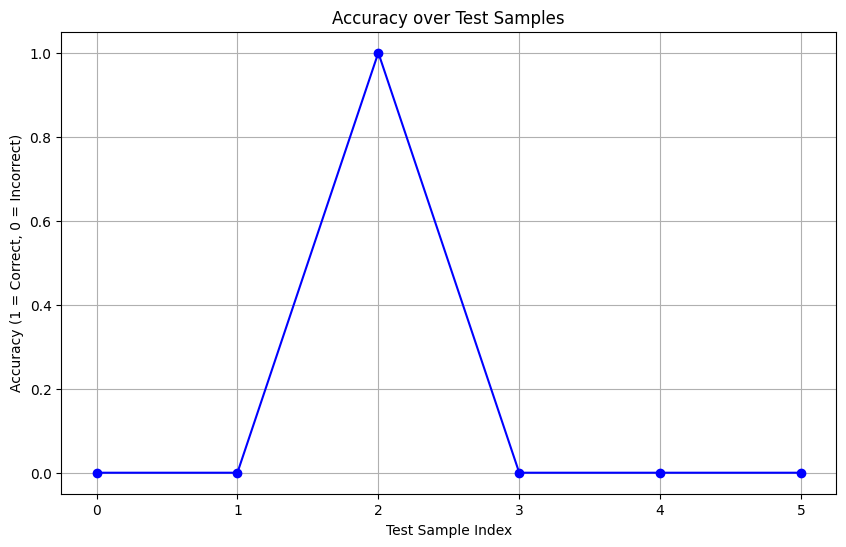

In [47]:
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming results contains the facial data (bbox, embedding)
# Example list of actual names (ground truth)
actual_names = ['Angelina Jolie', 'Barack Obama', 'Chris Evans', 'Morgan Freeman', 'Sameer', 'Scarlett Johansson']
predicted_names = []

# Iterate through test results
for res in results:
    embeddings = res['embedding']
    
    # Use the ML algorithm to predict the name based on the embeddings
    predicted_name, _ = ml_search_algorithm(dataframe_compressed, "Facial_Features", test_vector=embeddings, name_role=['Name', 'Role'], thresh=0.5)
    
    # Append the predicted name to the list
    predicted_names.append(predicted_name)

# Calculate accuracy
accuracy = accuracy_score(actual_names, predicted_names)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(predicted_names)

# Optional: plot accuracy over test samples
accuracies = [1 if actual == predicted else 0 for actual, predicted in zip(actual_names, predicted_names)]

plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', color='b', label="Accuracy per test")
plt.title("Accuracy over Test Samples")
plt.xlabel("Test Sample Index")
plt.ylabel("Accuracy (1 = Correct, 0 = Incorrect)")
plt.grid(True)
plt.show()
